In [23]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import pandas.io.sql as psql
import numpy as np
import matplotlib.pyplot as plt
import psycopg2 as pg

In [29]:
connection = pg.connect("host='localhost' dbname=Data user= postgres password='******'")



In [30]:
# Query Table Salary in the the Database
salaries = pd.read_sql("SELECT * FROM salaries", connection)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [31]:
# Query Table Titles in the the Database
titles = pd.read_sql("SELECT * FROM titles", connection)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [32]:
# Query list employees' numbers and their corresponding titles and salaries in the the Database
employees_title_salary = pd.read_sql("SELECT e.emp_no, t.title, s.salary \
                         FROM employees e \
                         RIGHT JOIN titles t\
                         ON (e.emp_no = t.emp_no)\
                         RIGHT JOIN salaries s\
                         ON (t.emp_no = s.emp_no)", connection)
employees_title_salary.head()

,emp_no,title,salary
0,10001,Senior Engineer,60117
1,10005,Senior Staff,78228
2,10005,Staff,78228
3,10010,Engineer,72488
4,10011,Staff,42365


In [35]:
# Create a DataFrame with the average salary for each title. 
avg_salary_each_title = pd.DataFrame(employees_title_salary.groupby(["title"]).mean()["salary"]).reset_index()
avg_salary_each_title.head()

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614


Text(0, 0.5, 'Average salaries')

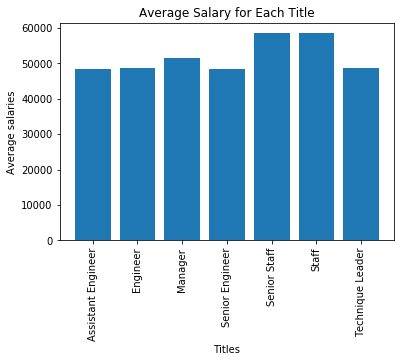

In [40]:
# Create a bar chart using matplotlib
plt.bar(np.arange(len(avg_salary_each_title)), avg_salary_each_title.salary, align = "center")
plt.xticks([lable for lable in np.arange(len(avg_salary_each_title))], avg_salary_each_title["title"],
           rotation = 90)
plt.title("Average Salary for Each Title")
plt.xlabel("Titles")
plt.ylabel("Average salaries")
